In [ ]:
import requests
import numpy as np
from scipy.spatial import ConvexHull

# WeatherAPI configuration
API_KEY = "e34b08c991364eab955142308251103"
BASE_URL = "http://api.weatherapi.com/v1/current.json"

# List of cities to check (expanded for more storm data points)
cities = [
    "New York", "Los Angeles", "Miami", "Houston", "Chicago",
    "San Francisco", "Seattle", "Boston", "Atlanta", "Denver",
    "Dallas", "Las Vegas", "Phoenix", "Philadelphia", "Washington"
]

# Storm detection thresholds (lowered for more data points)
WIND_THRESHOLD = 30  # km/h (reduced from 50 km/h)
HUMIDITY_THRESHOLD = 70  # % (reduced from 75%)

storm_data = []

# Fetch weather data
for city in cities:
    try:
        response = requests.get(BASE_URL, params={"key": API_KEY, "q": city})
        data = response.json()

        if "error" in data:
            print(f"❌ Error fetching data for {city}: {data['error']['message']}")
            continue

        lat, lon = data["location"]["lat"], data["location"]["lon"]
        wind_speed = data["current"]["wind_kph"]
        humidity = data["current"]["humidity"]

        # Detect storm conditions
        if wind_speed >= WIND_THRESHOLD or humidity >= HUMIDITY_THRESHOLD:
            storm_data.append((lon, lat))
            print(f"✔️ Storm detected in {city}: Wind {wind_speed} km/h, Humidity {humidity}%")
        else:
            print(f"❌ {city} does not meet storm criteria (Wind: {wind_speed} km/h, Humidity: {humidity}%)")

    except Exception as e:
        print(f"❌ Error fetching data for {city}: {e}")

# Ensure we have enough points to form a boundary
if len(storm_data) < 3:
    print("❌ Not enough storm data points to form a boundary.")
else:
    # Convert to NumPy array for Convex Hull
    points = np.array(storm_data)
    hull = ConvexHull(points)

    print("\n🌪️ Storm Boundary Coordinates:")
    for vertex in hull.vertices:
        print(points[vertex])

❌ New York does not meet storm criteria (Wind: 5.8 km/h, Humidity: 49%)
❌ Los Angeles does not meet storm criteria (Wind: 6.8 km/h, Humidity: 54%)
✔️ Storm detected in Miami: Wind 7.9 km/h, Humidity 70%
✔️ Storm detected in Houston: Wind 10.1 km/h, Humidity 83%
✔️ Storm detected in Chicago: Wind 7.2 km/h, Humidity 80%
✔️ Storm detected in San Francisco: Wind 3.6 km/h, Humidity 82%
✔️ Storm detected in Seattle: Wind 4.7 km/h, Humidity 79%
✔️ Storm detected in Boston: Wind 10.4 km/h, Humidity 73%
❌ Atlanta does not meet storm criteria (Wind: 8.6 km/h, Humidity: 48%)
✔️ Storm detected in Denver: Wind 31.3 km/h, Humidity 77%
❌ Dallas does not meet storm criteria (Wind: 24.5 km/h, Humidity: 17%)
❌ Las Vegas does not meet storm criteria (Wind: 5.0 km/h, Humidity: 28%)
❌ Phoenix does not meet storm criteria (Wind: 7.6 km/h, Humidity: 24%)
❌ Philadelphia does not meet storm criteria (Wind: 5.8 km/h, Humidity: 65%)
❌ Washington does not meet storm criteria (Wind: 6.1 km/h, Humidity: 54%)

🌪️ St

In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# WeatherAPI key
API_KEY = "e34b08c991364eab955142308251103"
BASE_URL = "http://api.weatherapi.com/v1/current.json"

# Indian cities to monitor
cities = ["Mumbai", "Delhi", "Chennai", "Kolkata", "Bangalore", "Hyderabad", "Ahmedabad", "Pune", "Jaipur", "Lucknow"]

storm_data = []

# Fetch weather data
for city in cities:
    params = {"key": API_KEY, "q": city}
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    if "current" in data:
        wind_speed = data["current"]["wind_kph"]
        lat = data["location"]["lat"]
        lon = data["location"]["lon"]

        # Consider locations with strong winds (> 30 kph) as stormy
        if wind_speed > 30:
            storm_data.append((lon, lat))
            print(f"✅ Storm detected in {city} at ({lon}, {lat}) with wind speed {wind_speed} kph")
        else:
            print(f"⚠️ No storm in {city}, wind speed {wind_speed} kph")
    else:
        print(f"❌ Error fetching data for {city}")

# Ensure enough points to form a convex hull
if len(storm_data) < 3:
    print("❌ Not enough storm data points to form a boundary.")
else:
    points = np.array(storm_data)
    hull = ConvexHull(points)

    # Print hull boundary points
    print("\nConvex Hull Boundary Points:")
    for index in hull.vertices:
        print(f"{points[index]}")

    # Plotting the storm locations and convex hull
    plt.figure(figsize=(8, 6))
    plt.scatter(points[:, 0], points[:, 1], color='blue', label='Storm Data Points')

    # Draw hull boundary
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'r-', linewidth=2)

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Convex Hull for Storm Boundaries in India")
    plt.legend()
    plt.show()


⚠️ No storm in Mumbai, wind speed 24.1 kph
⚠️ No storm in Delhi, wind speed 20.9 kph
⚠️ No storm in Chennai, wind speed 18.4 kph
⚠️ No storm in Kolkata, wind speed 14.4 kph
⚠️ No storm in Bangalore, wind speed 20.2 kph
⚠️ No storm in Hyderabad, wind speed 18.7 kph
⚠️ No storm in Ahmedabad, wind speed 21.2 kph
⚠️ No storm in Pune, wind speed 22.3 kph
⚠️ No storm in Jaipur, wind speed 9.0 kph
⚠️ No storm in Lucknow, wind speed 11.5 kph
❌ Not enough storm data points to form a boundary.


In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# WeatherAPI key
API_KEY = "e34b08c991364eab955142308251103"
BASE_URL = "http://api.weatherapi.com/v1/current.json"

# Indian cities to monitor
cities = [
    "New York", "Los Angeles", "Miami", "Houston", "Chicago",
    "San Francisco", "Seattle", "Boston", "Atlanta", "Denver",
    "Dallas", "Las Vegas", "Phoenix", "Philadelphia", "Washington"
]

storm_data = []

# Fetch weather data
for city in cities:
    params = {"key": API_KEY, "q": city}
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    if "current" in data:
        wind_speed = data["current"]["wind_kph"]
        lat = data["location"]["lat"]
        lon = data["location"]["lon"]

        # Consider locations with strong winds (> 30 kph) as stormy
        if wind_speed > 30:
            storm_data.append((lon, lat))
            print(f"✅ Storm detected in {city} at ({lon}, {lat}) with wind speed {wind_speed} kph")
        else:
            print(f"⚠️ No storm in {city}, wind speed {wind_speed} kph")
    else:
        print(f"❌ Error fetching data for {city}")

# Ensure enough points to form a convex hull
if len(storm_data) < 3:
    print("❌ Not enough storm data points to form a boundary.")
else:
    points = np.array(storm_data)
    hull = ConvexHull(points)

    # Print hull boundary points
    print("\nConvex Hull Boundary Points:")
    for index in hull.vertices:
        print(f"{points[index]}")

    # Plotting the storm locations and convex hull
    plt.figure(figsize=(8, 6))
    plt.scatter(points[:, 0], points[:, 1], color='blue', label='Storm Data Points')

    # Draw hull boundary
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'r-', linewidth=2)

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Convex Hull for Storm Boundaries in India")
    plt.legend()
    plt.show()


⚠️ No storm in New York, wind speed 5.8 kph
⚠️ No storm in Los Angeles, wind speed 6.8 kph
⚠️ No storm in Miami, wind speed 7.9 kph
⚠️ No storm in Houston, wind speed 10.1 kph
⚠️ No storm in Chicago, wind speed 7.2 kph
⚠️ No storm in San Francisco, wind speed 3.6 kph
⚠️ No storm in Seattle, wind speed 4.7 kph
⚠️ No storm in Boston, wind speed 10.4 kph
⚠️ No storm in Atlanta, wind speed 8.6 kph
✅ Storm detected in Denver at (-104.9842, 39.7392) with wind speed 31.3 kph
⚠️ No storm in Dallas, wind speed 24.5 kph
⚠️ No storm in Las Vegas, wind speed 5.0 kph
⚠️ No storm in Phoenix, wind speed 7.6 kph
⚠️ No storm in Philadelphia, wind speed 5.8 kph
⚠️ No storm in Washington, wind speed 6.1 kph
❌ Not enough storm data points to form a boundary.


Since this time of the year(April) does not see storms across most parts of the globe extracting the boundary with the windspeeds(live tracking using api) was not feasible. So we went on to derive this data from historical dataset.
Below is the data for 3 years taken from "International Best Track Archive for Climate Stewardship (IBTrACS)".

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/ibtracs.last3years.list.v04r01.csv"
df = pd.read_csv(file_path, low_memory=False)

# Display the first few rows
print(df.head())

# Display column names
print(df.columns)

             SID SEASON NUMBER BASIN SUBBASIN     NAME             ISO_TIME  \
0                  Year                                                       
1  2022008S13148   2022      1    SP       EA  TIFFANY  2022-01-08 00:00:00   
2  2022008S13148   2022      1    SP       EA  TIFFANY  2022-01-08 03:00:00   
3  2022008S13148   2022      1    SP       EA  TIFFANY  2022-01-08 06:00:00   
4  2022008S13148   2022      1    SP       EA  TIFFANY  2022-01-08 09:00:00   

  NATURE            LAT           LON  ... BOM_GUST_PER REUNION_GUST  \
0         degrees_north  degrees_east  ...       second          kts   
1     MX          -12.6         147.7  ...           45                
2     MX          -12.9         147.8  ...                             
3     MX          -13.1         147.9  ...           45                
4     MX          -13.2         147.9  ...                             

  REUNION_GUST_PER USA_SEAHGT USA_SEARAD_NE USA_SEARAD_SE USA_SEARAD_SW  \
0           secon

In [ ]:
# Filter storms based on basin (Indian Ocean is usually
#marked as 'NI' for North Indian and 'SI' for South Indian)
indian_ocean_storms = df[df['BASIN'].isin(['NI', 'SI'])]

# Display unique storm names
print(indian_ocean_storms['NAME'].unique())

# Select a specific storm for analysis
storm_name = "MOCHA"  # Replace with an actual storm name from the output above
selected_storm = indian_ocean_storms[indian_ocean_storms['NAME'] == storm_name]

# Show the first few rows of this storm
print(selected_storm[['ISO_TIME', 'LAT', 'LON', 'NAME']])

['TIFFANY' 'ANA' 'BATSIRAI' 'CLIFF' 'DUMAKO' 'EMNATI' 'VERNON' 'ANIKA'
 'UNNAMED' 'GOMBE' 'BILLY' 'CHARLOTTE' 'HALIMA' 'JASMINE' 'ASANI' 'KARIM'
 'ASHLEY' 'BALITA' 'SITRANG' 'MANDOUS' 'DARIAN' 'ELLIE' 'CHENESO'
 'DINGANI' 'FREDDY' 'ENALA' 'HERMAN' 'ILSA' 'MOCHA' 'FABIEN' 'BIPARJOY'
 'TEJ' 'HAMOON' 'MIDHILI' 'MICHAUNG' 'ALVARO' 'ANGGREK' 'BELAL' 'CANDICE'
 'LINCOLN' 'DJOUNGOU' 'ELEANOR' 'NEVILLE' 'FILIPO' 'MEGAN' 'GAMANE' 'OLGA'
 'HIDAYA' 'IALY' 'REMAL' 'ASNA' 'ANCHA' 'DANA' 'BHEKI' 'ROBYN' 'FENGAL'
 'CHIDO' 'DIKELEDI' 'SEAN' 'FAIDA' 'ELVIS' 'TALIAH' 'VINCE' 'ZELIA'
 'BIANCA' 'GARANCE' 'HONDE']
                 ISO_TIME   LAT   LON   NAME
7478  2023-05-08 18:00:00   7.7  91.4  MOCHA
7479  2023-05-08 21:00:00   7.6  91.1  MOCHA
7480  2023-05-09 00:00:00   7.6  90.7  MOCHA
7481  2023-05-09 03:00:00   7.6  90.1  MOCHA
7482  2023-05-09 06:00:00   7.6  89.6  MOCHA
7483  2023-05-09 09:00:00   7.7  89.3  MOCHA
7484  2023-05-09 12:00:00   7.9  89.3  MOCHA
7485  2023-05-09 15:00:00   8.1  89.2  

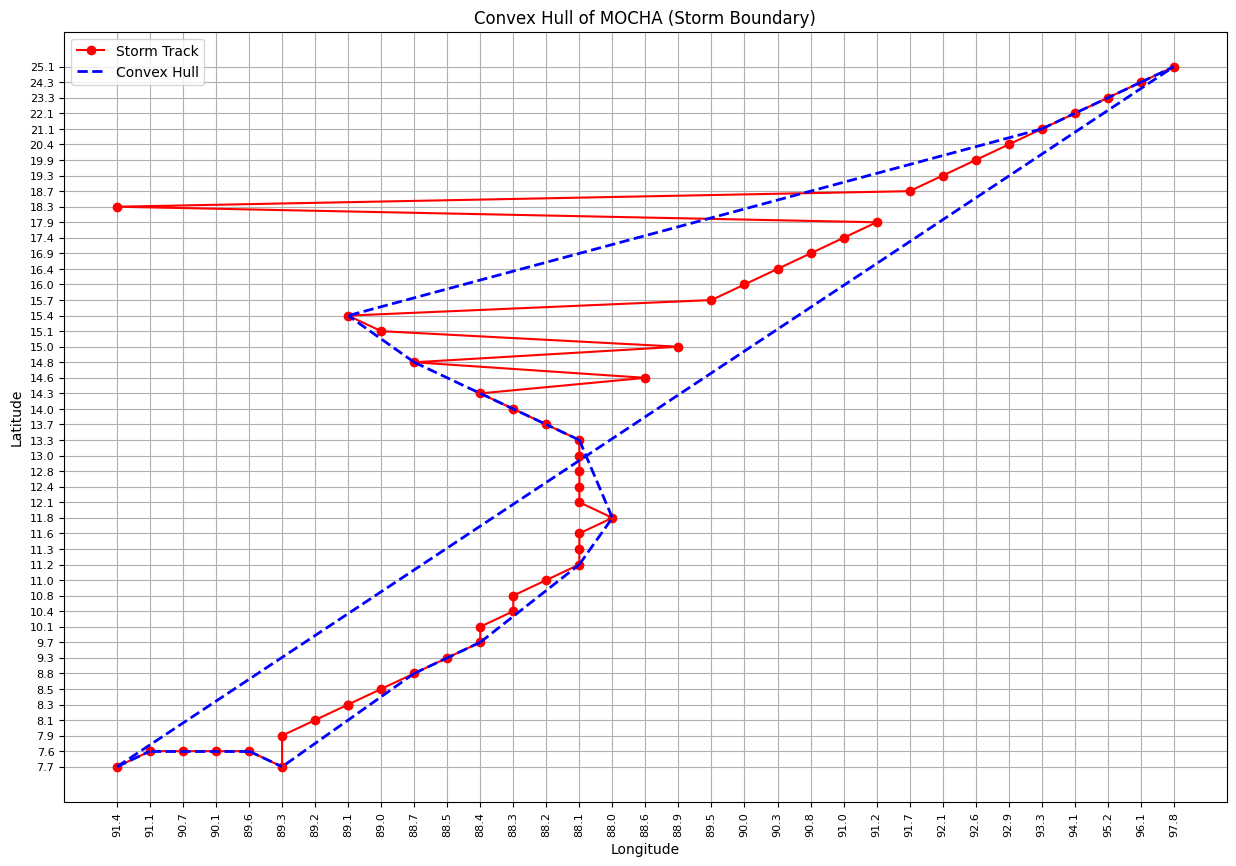

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Convert to NumPy array
points = selected_storm[['LAT', 'LON']].dropna().to_numpy()

# Compute Convex Hull
hull = ConvexHull(points)

# Plot the Storm Track
plt.figure(figsize=(15, 10))
plt.plot(points[:, 1], points[:, 0], 'ro-', label='Storm Track')

# Plot Convex Hull boundary
for simplex in hull.simplices:
    plt.plot(points[simplex, 1], points[simplex, 0], 'b--', lw=2, label='Convex Hull' if 'Convex Hull' not in plt.gca().get_legend_handles_labels()[1] else "")

# Labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Convex Hull of {storm_name} (Storm Boundary)")
plt.legend()
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
plt.show()

<ipython-input-40-e9722c1ff25e>:44: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


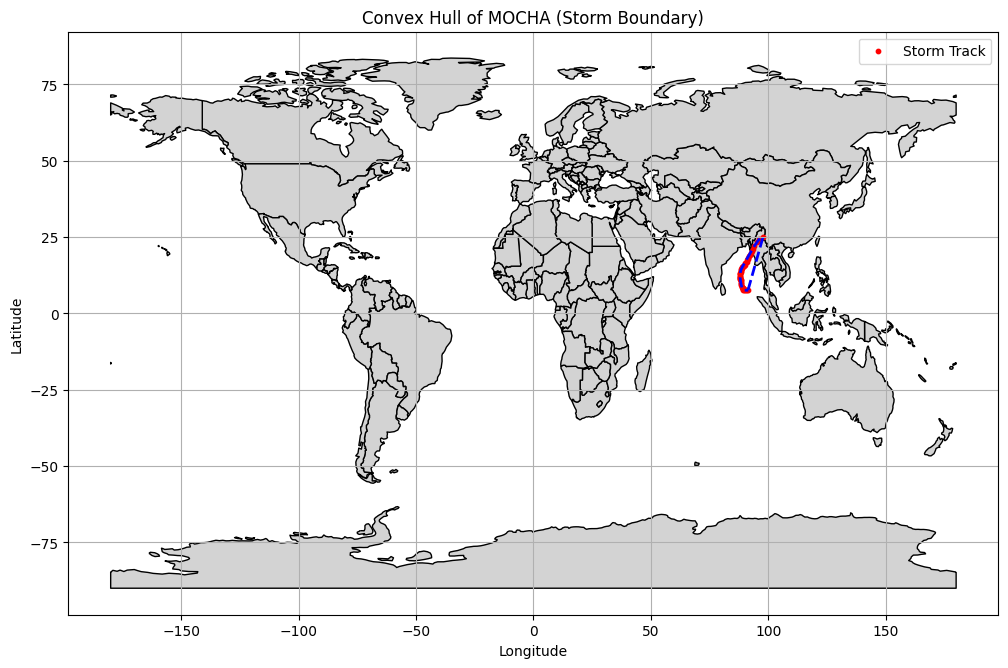

In [ ]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon, Point

# Convert to NumPy array (Ensure correct order: Longitude, Latitude)
points = selected_storm[['LON', 'LAT']].dropna().to_numpy()

# Compute Convex Hull if we have enough points
if len(points) > 2:
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]
    hull_polygon = Polygon(hull_points)
    gdf_hull = gpd.GeoDataFrame(geometry=[hull_polygon], crs="EPSG:4326")
else:
    print("⚠️ Not enough points to form a Convex Hull!")
    gdf_hull = None

# Create GeoDataFrame for storm track points
gdf_points = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in points], crs="EPSG:4326")

world = gpd.read_file("https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson")

# Plot the storm track
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray', edgecolor='black')  # Base map

# Plot storm track points
gdf_points.plot(ax=ax, color='red', markersize=10, label="Storm Track")

# Plot Convex Hull if valid
if gdf_hull is not None:
    gdf_hull.plot(ax=ax, edgecolor='blue', facecolor='none', linestyle="--", linewidth=2, label="Convex Hull")

# Set Aspect Ratio Manually
ax.set_aspect(1.3)

# Labels & Title
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"Convex Hull of {storm_name} (Storm Boundary)")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/ibtracs.last3years.list.v04r01.csv"
df = pd.read_csv(file_path, low_memory=False)

# Display available column names to identify relevant ones
print(df.columns)

# Filter storms that belong to the North Indian (NI) and South Indian (SI) basins
indian_ocean_storms = df[df['BASIN'].isin(['NI', 'SI'])]

# List unique storm names
storm_names = indian_ocean_storms['NAME'].dropna().unique()

# Print all storm names in NI and SI basins
print("Storms in the Indian Ocean (NI & SI):")
print(storm_names)

Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON',
       ...
       'BOM_GUST_PER', 'REUNION_GUST', 'REUNION_GUST_PER', 'USA_SEAHGT',
       'USA_SEARAD_NE', 'USA_SEARAD_SE', 'USA_SEARAD_SW', 'USA_SEARAD_NW',
       'STORM_SPEED', 'STORM_DIR'],
      dtype='object', length=174)
Storms in the Indian Ocean (NI & SI):
['TIFFANY' 'ANA' 'BATSIRAI' 'CLIFF' 'DUMAKO' 'EMNATI' 'VERNON' 'ANIKA'
 'UNNAMED' 'GOMBE' 'BILLY' 'CHARLOTTE' 'HALIMA' 'JASMINE' 'ASANI' 'KARIM'
 'ASHLEY' 'BALITA' 'SITRANG' 'MANDOUS' 'DARIAN' 'ELLIE' 'CHENESO'
 'DINGANI' 'FREDDY' 'ENALA' 'HERMAN' 'ILSA' 'MOCHA' 'FABIEN' 'BIPARJOY'
 'TEJ' 'HAMOON' 'MIDHILI' 'MICHAUNG' 'ALVARO' 'ANGGREK' 'BELAL' 'CANDICE'
 'LINCOLN' 'DJOUNGOU' 'ELEANOR' 'NEVILLE' 'FILIPO' 'MEGAN' 'GAMANE' 'OLGA'
 'HIDAYA' 'IALY' 'REMAL' 'ASNA' 'ANCHA' 'DANA' 'BHEKI' 'ROBYN' 'FENGAL'
 'CHIDO' 'DIKELEDI' 'SEAN' 'FAIDA' 'ELVIS' 'TALIAH' 'VINCE' 'ZELIA'
 'BIANCA' 'GARANCE' 'HONDE']


In [ ]:
# Filter storms based on basin (Indian Ocean is usually marked as 'NI' for North Indian and 'SI' for South Indian)
indian_ocean_storms = df[df['BASIN'].isin(['NI', 'SI'])]

# Display unique storm names
print(indian_ocean_storms['NAME'].unique())

# Select a specific storm for analysis
storm_name = "TALIAH"  # Replace with an actual storm name from the output above
selected_storm = indian_ocean_storms[indian_ocean_storms['NAME'] == storm_name]

# Show the first few rows of this storm
print(selected_storm[['ISO_TIME', 'LAT', 'LON', 'NAME']])

['TIFFANY' 'ANA' 'BATSIRAI' 'CLIFF' 'DUMAKO' 'EMNATI' 'VERNON' 'ANIKA'
 'UNNAMED' 'GOMBE' 'BILLY' 'CHARLOTTE' 'HALIMA' 'JASMINE' 'ASANI' 'KARIM'
 'ASHLEY' 'BALITA' 'SITRANG' 'MANDOUS' 'DARIAN' 'ELLIE' 'CHENESO'
 'DINGANI' 'FREDDY' 'ENALA' 'HERMAN' 'ILSA' 'MOCHA' 'FABIEN' 'BIPARJOY'
 'TEJ' 'HAMOON' 'MIDHILI' 'MICHAUNG' 'ALVARO' 'ANGGREK' 'BELAL' 'CANDICE'
 'LINCOLN' 'DJOUNGOU' 'ELEANOR' 'NEVILLE' 'FILIPO' 'MEGAN' 'GAMANE' 'OLGA'
 'HIDAYA' 'IALY' 'REMAL' 'ASNA' 'ANCHA' 'DANA' 'BHEKI' 'ROBYN' 'FENGAL'
 'CHIDO' 'DIKELEDI' 'SEAN' 'FAIDA' 'ELVIS' 'TALIAH' 'VINCE' 'ZELIA'
 'BIANCA' 'GARANCE' 'HONDE']
                  ISO_TIME    LAT    LON    NAME
17230  2025-02-02 00:00:00  -14.7  117.0  TALIAH
17231  2025-02-02 03:00:00  -14.6  116.4  TALIAH
17232  2025-02-02 06:00:00  -14.5  116.1  TALIAH
17233  2025-02-02 09:00:00  -14.3  116.1  TALIAH
17234  2025-02-02 12:00:00  -14.2  116.2  TALIAH
...                    ...    ...    ...     ...
17366  2025-02-19 00:00:00  -31.1   75.8  TALIAH
17367  

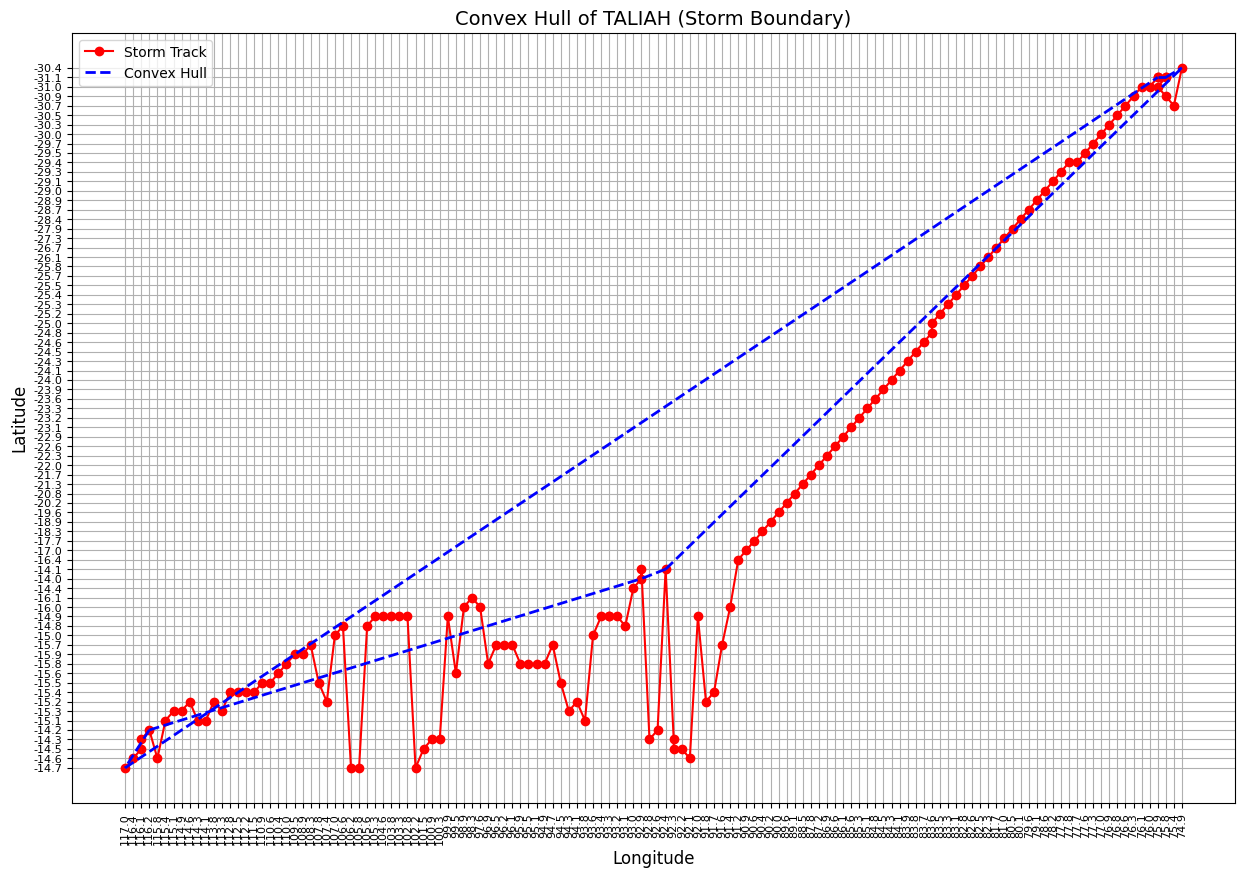

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Convert to NumPy array
points = selected_storm[['LAT', 'LON']].dropna().to_numpy()

# Compute Convex Hull
hull = ConvexHull(points)

# Plot the Storm Track
plt.figure(figsize=(15, 10))  # Increased figure size for better visibility
plt.plot(points[:, 1], points[:, 0], 'ro-', label='Storm Track')

# Plot Convex Hull boundary
for simplex in hull.simplices:
    plt.plot(points[simplex, 1], points[simplex, 0], 'b--', lw=2, label='Convex Hull' if 'Convex Hull' not in plt.gca().get_legend_handles_labels()[1] else "")

# Labels
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.title(f"Convex Hull of {storm_name} (Storm Boundary)", fontsize=14)
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)


plt.show()


<ipython-input-37-e9722c1ff25e>:44: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


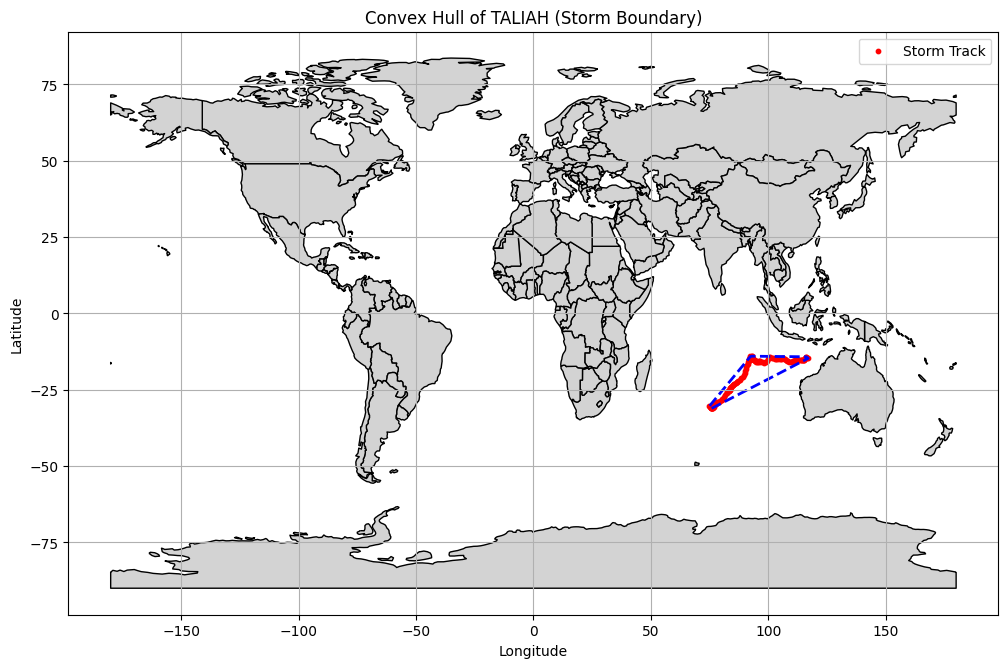

In [ ]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon, Point

# Convert to NumPy array (Ensure correct order: Longitude, Latitude)
points = selected_storm[['LON', 'LAT']].dropna().to_numpy()

# Compute Convex Hull if we have enough points
if len(points) > 2:
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]
    hull_polygon = Polygon(hull_points)
    gdf_hull = gpd.GeoDataFrame(geometry=[hull_polygon], crs="EPSG:4326")
else:
    print("⚠️ Not enough points to form a Convex Hull!")
    gdf_hull = None

# Create GeoDataFrame for storm track points
gdf_points = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in points], crs="EPSG:4326")

# ✅ FIX: Load world map from Natural Earth manually
world = gpd.read_file("https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson")

# Plot the storm track
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray', edgecolor='black')  # Base map

# Plot storm track points
gdf_points.plot(ax=ax, color='red', markersize=10, label="Storm Track")

# Plot Convex Hull if valid
if gdf_hull is not None:
    gdf_hull.plot(ax=ax, edgecolor='blue', facecolor='none', linestyle="--", linewidth=2, label="Convex Hull")

# Set Aspect Ratio Manually
ax.set_aspect(1.3)

# Labels & Title
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"Convex Hull of {storm_name} (Storm Boundary)")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Filter storms based on basin (Indian Ocean is usually marked as 'NI' for North Indian and 'SI' for South Indian)
indian_ocean_storms = df[df['BASIN'].isin(['NI', 'SI'])]

# Display unique storm names
print(indian_ocean_storms['NAME'].unique())

# Select a specific storm for analysis
storm_name = "FENGAL"  # Replace with an actual storm name from the output above
selected_storm = indian_ocean_storms[indian_ocean_storms['NAME'] == storm_name]

# Show the first few rows of this storm
print(selected_storm[['ISO_TIME', 'LAT', 'LON', 'NAME']])

['TIFFANY' 'ANA' 'BATSIRAI' 'CLIFF' 'DUMAKO' 'EMNATI' 'VERNON' 'ANIKA'
 'UNNAMED' 'GOMBE' 'BILLY' 'CHARLOTTE' 'HALIMA' 'JASMINE' 'ASANI' 'KARIM'
 'ASHLEY' 'BALITA' 'SITRANG' 'MANDOUS' 'DARIAN' 'ELLIE' 'CHENESO'
 'DINGANI' 'FREDDY' 'ENALA' 'HERMAN' 'ILSA' 'MOCHA' 'FABIEN' 'BIPARJOY'
 'TEJ' 'HAMOON' 'MIDHILI' 'MICHAUNG' 'ALVARO' 'ANGGREK' 'BELAL' 'CANDICE'
 'LINCOLN' 'DJOUNGOU' 'ELEANOR' 'NEVILLE' 'FILIPO' 'MEGAN' 'GAMANE' 'OLGA'
 'HIDAYA' 'IALY' 'REMAL' 'ASNA' 'ANCHA' 'DANA' 'BHEKI' 'ROBYN' 'FENGAL'
 'CHIDO' 'DIKELEDI' 'SEAN' 'FAIDA' 'ELVIS' 'TALIAH' 'VINCE' 'ZELIA'
 'BIANCA' 'GARANCE' 'HONDE']
                  ISO_TIME   LAT   LON    NAME
16878  2024-11-29 18:00:00  12.4  81.8  FENGAL
16879  2024-11-29 21:00:00  12.5  81.7  FENGAL
16880  2024-11-30 00:00:00  12.5  81.5  FENGAL
16881  2024-11-30 03:00:00  12.5  81.2  FENGAL
16882  2024-11-30 06:00:00  12.4  80.9  FENGAL
16883  2024-11-30 09:00:00  12.4  80.7  FENGAL
16884  2024-11-30 12:00:00  12.4  80.6  FENGAL
16885  2024-11-30 15:00

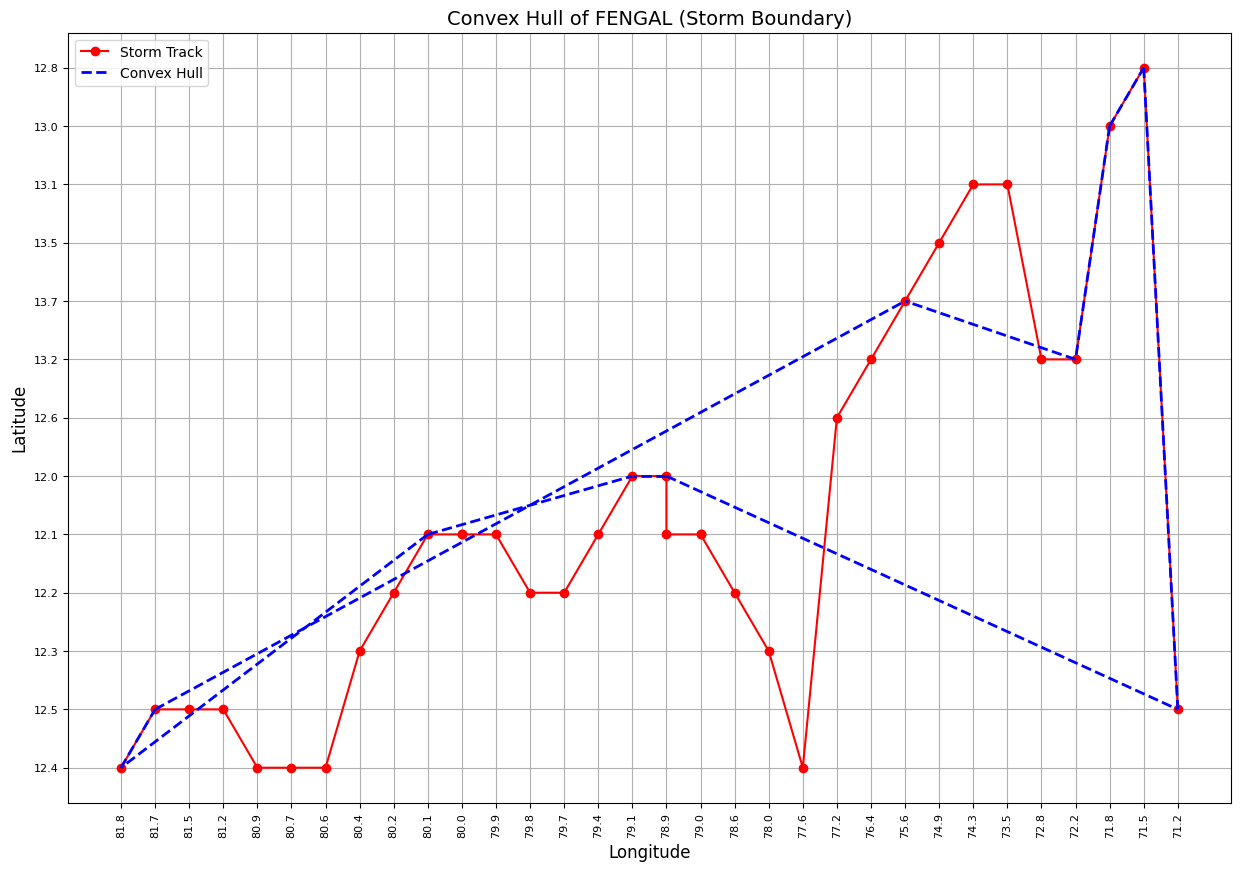

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Convert to NumPy array
points = selected_storm[['LAT', 'LON']].dropna().to_numpy()

# Compute Convex Hull
hull = ConvexHull(points)

# Plot the Storm Track
plt.figure(figsize=(15, 10))  # Increased figure size for better visibility
plt.plot(points[:, 1], points[:, 0], 'ro-', label='Storm Track')

# Plot Convex Hull boundary
for simplex in hull.simplices:
    plt.plot(points[simplex, 1], points[simplex, 0], 'b--', lw=2, label='Convex Hull' if 'Convex Hull' not in plt.gca().get_legend_handles_labels()[1] else "")

# Labels
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.title(f"Convex Hull of {storm_name} (Storm Boundary)", fontsize=14)
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)


plt.show()


<ipython-input-43-e9722c1ff25e>:44: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


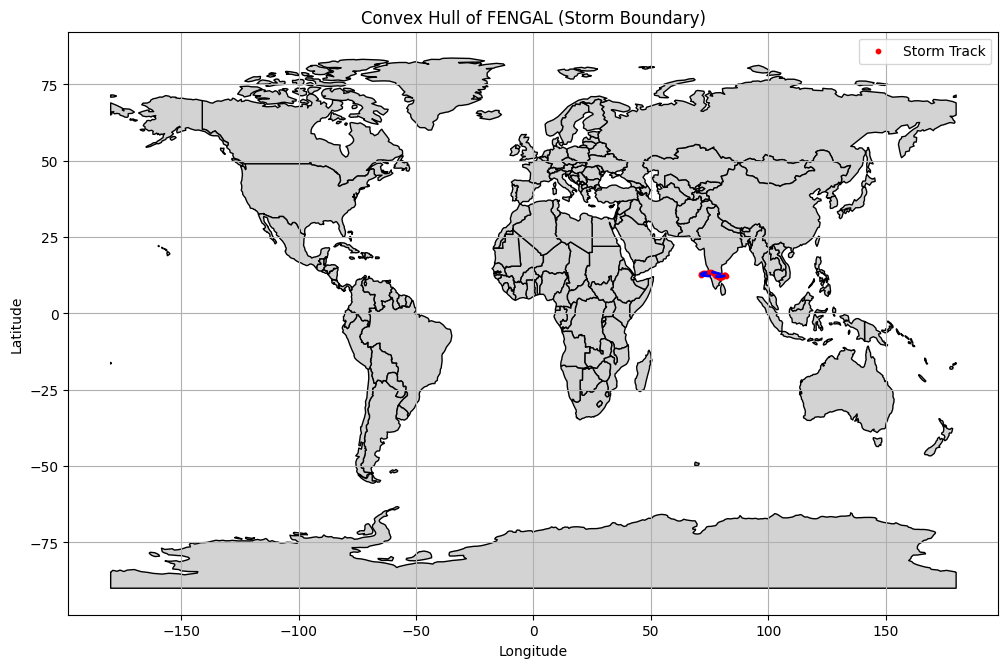

In [ ]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon, Point

# Convert to NumPy array (Ensure correct order: Longitude, Latitude)
points = selected_storm[['LON', 'LAT']].dropna().to_numpy()

# Compute Convex Hull if we have enough points
if len(points) > 2:
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]
    hull_polygon = Polygon(hull_points)
    gdf_hull = gpd.GeoDataFrame(geometry=[hull_polygon], crs="EPSG:4326")
else:
    print("⚠️ Not enough points to form a Convex Hull!")
    gdf_hull = None

# Create GeoDataFrame for storm track points
gdf_points = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in points], crs="EPSG:4326")

# ✅ FIX: Load world map from Natural Earth manually
world = gpd.read_file("https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson")

# Plot the storm track
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray', edgecolor='black')  # Base map

# Plot storm track points
gdf_points.plot(ax=ax, color='red', markersize=10, label="Storm Track")

# Plot Convex Hull if valid
if gdf_hull is not None:
    gdf_hull.plot(ax=ax, edgecolor='blue', facecolor='none', linestyle="--", linewidth=2, label="Convex Hull")

# Set Aspect Ratio Manually
ax.set_aspect(1.3)

# Labels & Title
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"Convex Hull of {storm_name} (Storm Boundary)")
plt.legend()
plt.grid(True)

plt.show()

Convex Hull Points: [[58, 357], [597, 592], [68, 672], [531, 671], [282, 680], [560, 148], [573, 181], [73, 58], [267, 81]]


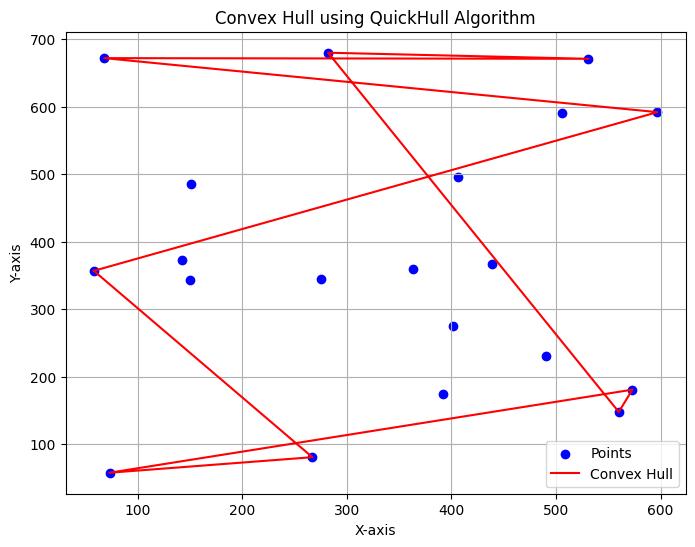

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from math import sqrt

# Set total number of points to be randomly generated
NUM_POINTS = 20

# Slow down visualization time
SLOWDOWN_PER_STEP = 0.25

def convexHull(pList):
    """Computes the Convex Hull using QuickHull Algorithm."""
    if len(pList) < 3:
        return pList  # Convex Hull requires at least 3 points

    # Find left-most and right-most points
    leftPoint = min(pList)
    rightPoint = max(pList)

    # Store convex hull points
    convexHullList = [leftPoint, rightPoint]

    # Call upperHull and lowerHull algorithms
    allPointsUpper = upperHull(leftPoint, rightPoint, pList)
    allPointsLower = upperHull(rightPoint, leftPoint, pList)

    convexHullList += allPointsUpper
    convexHullList += allPointsLower

    print("Convex Hull Points:", convexHullList)

    return convexHullList


def upperHull(a, b, pList):
    """Finds the points in the upper hull recursively."""
    if not pList:
        return []

    upperHullPoints = []
    maxDis = 0.0
    furthestPoint = None

    for p in pList:
        if isLeft(a, b, p):
            upperHullPoints.append(p)
            pDis = findDistance(a, b, p)
            if pDis > maxDis:
                maxDis = pDis
                furthestPoint = p

    if furthestPoint:
        region1 = upperHull(a, furthestPoint, upperHullPoints)
        region3 = upperHull(furthestPoint, b, upperHullPoints)
        return [furthestPoint] + region1 + region3

    return []


# Geometric Calculation Functions

def findDistance(a, b, p):
    """Computes the perpendicular distance of point p from line (a,b)."""
    ax, ay = a
    bx, by = b
    px, py = p

    d = abs((bx - ax) * (ay - py) - (ax - px) * (by - ay)) / sqrt((bx - ax) ** 2 + (by - ay) ** 2)
    return d


def isLeft(a, b, c):
    """Checks if point c is to the left of line (a,b)."""
    ax, ay = a
    bx, by = b
    cx, cy = c

    return ((bx - ax) * (cy - ay)) - ((cx - ax) * (by - ay)) > 0


# Generate random set of points
pointList = [[random.randint(0, 700), random.randint(0, 700)] for _ in range(NUM_POINTS)]

# Compute Convex Hull
chResult = convexHull(pointList)

# Plot the points and convex hull
plt.figure(figsize=(8, 6))
points = np.array(pointList)

# Plot all points
plt.scatter(points[:, 0], points[:, 1], color='blue', label="Points")

# Plot convex hull
chResult.append(chResult[0])  # Closing the hull
hull_points = np.array(chResult)
plt.plot(hull_points[:, 0], hull_points[:, 1], 'r-', label="Convex Hull")

# Labels and grid
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Convex Hull using QuickHull Algorithm")
plt.legend()
plt.grid(True)
plt.show()